In [1]:
import pandas as pd
import geopandas as gpd
import shapely

import numpy as np
import os
import re
import tempfile

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Load dataframes

In [3]:
from etl import load_debt, load_receipt, load_filer, load_expense, load_contributions

In [4]:
debt = load_debt()
receipt = load_receipt()
filer = load_filer()
expense = load_expense()
contrib = load_contributions()

Loading data frame from data/debt.pkl.
Data frame loaded.
Loading data frame from data/receipt.pkl.
Data frame loaded.
Loading data frame from data/filer.pkl.
Data frame loaded.
Loading data frame from data/expense.pkl.
Data frame loaded.
Loading data frame from data/contrib.pkl.
Data frame loaded.


## load pa house districts

In [5]:
fname = os.path.join('data', 'PA_house.geojson')

with open(fname, 'r') as f:
    a = f.readlines()
pa_house = gpd.read_file(fname, driver='GeoJSON')

In [6]:
def plot(foreground, background):
    base = background.plot(color='white', edgecolor='black')
    return foreground.plot(ax=base, color='red');

# Working with shapely

In [7]:
from shapely.geometry import LineString

In [8]:
def build_line(x, y=None):
    if x is None:
        return None
    else:
        return LineString([x, y])


def get_filer_from_df(filer_id, df):
    x = filer[filer.filer_id == filer_id].iloc[0]
    name = x['Filer Name']
    point = x.geometry

    temp_df = df[df.filer_id == filer_id].copy()
    temp_df.geometry = temp_df.geometry.apply(lambda x: build_line(x, point))
    return name, temp_df

## filers

In [9]:
contrib.groupby('filer_id').count().sort_values('Section', ascending=False).head(5)

,Filer Identification Number,Election Year,Election Cycle,Section,Contributor,Contributor Address 1,Contributor Address 2,Contributor City,Contributor State,Contributor Zip Code,...,Contribution Date,Contribution Amount,Contribution Description,Contributor Location 1,Contributor Location 2,Employer Location 1,Employer Location 2,amount,address,geometry
filer_id,,,,,,,,,,,,,,,,,,,,,
8600230,28132,28132,28132,28132,28132,28132,28132,28132,28132,28132,...,28132,28132,28132,28132,28132,28132,28132,28132,28132,28132
8200581,17589,17589,17589,17589,17589,17589,17589,17589,17589,17589,...,17589,17589,17589,17589,17589,17589,17589,17589,17589,17589
7900477,9749,9749,9749,9749,9749,9749,9749,9749,9749,9749,...,9749,9749,9749,9749,9749,9749,9749,9749,9749,9749
2002281,7561,7561,7561,7561,7561,7561,7561,7561,7561,7561,...,7561,7561,7561,7561,7561,7561,7561,7561,7561,7544
7900366,6465,6465,6465,6465,6465,6465,6465,6465,6465,6465,...,6465,6465,6465,6465,6465,6465,6465,6465,6465,6454


In [10]:
filer_id = '7900366'
name, df = get_filer_from_df(filer_id, contrib)

In [11]:
name

'PSEA-PACE FOR STATE ELECTIONS'

In [12]:
df.head()

,Filer Identification Number,Election Year,Election Cycle,Section,Contributor,Contributor Address 1,Contributor Address 2,Contributor City,Contributor State,Contributor Zip Code,...,Contribution Amount,Contribution Description,Contributor Location 1,Contributor Location 2,Employer Location 1,Employer Location 2,amount,filer_id,address,geometry
536,7900366,2017,3,IB,ROSEMARIE J PAOLUCCI,356 SIDNEY AVE,PO BOX 625,POCONO SUMMIT,PA,183460625,...,$21.00,,"356 SIDNEY AVE\nPOCONO SUMMIT, PA 183460625\n","PO BOX 625\nPOCONO SUMMIT, PA 183460625\n",,,21.0,7900366,356 SIDNEY AVE PO BOX 625 POCONO SUMMIT PA 183...,None
537,7900366,2017,3,IB,ROSEMARIE J PAOLUCCI,356 SIDNEY AVE,PO BOX 625,POCONO SUMMIT,PA,183460625,...,$10.00,,"356 SIDNEY AVE\nPOCONO SUMMIT, PA 183460625\n","PO BOX 625\nPOCONO SUMMIT, PA 183460625\n",,,10.0,7900366,356 SIDNEY AVE PO BOX 625 POCONO SUMMIT PA 183...,None
538,7900366,2017,3,IB,ROSEMARIE J PAOLUCCI,356 SIDNEY AVE,PO BOX 625,POCONO SUMMIT,PA,183460625,...,$21.00,,"356 SIDNEY AVE\nPOCONO SUMMIT, PA 183460625\n","PO BOX 625\nPOCONO SUMMIT, PA 183460625\n",,,21.0,7900366,356 SIDNEY AVE PO BOX 625 POCONO SUMMIT PA 183...,None
62942,7900366,2017,2,IB,LUCY C HARLOW,PO BOX 266,,LEMONT,PA,168510266,...,$20.00,,"PO BOX 266\nLEMONT, PA 168510266\n","LEMONT, PA 168510266\n(40.809342, -77.817072)",,,20.0,7900366,PO BOX 266 LEMONT PA 168510266,"LINESTRING (-77.817072 40.809342, -76.884517 4..."
64951,7900366,2017,3,IB,PATTY A HANSEN,PO BOX 562,,GREENTOWN,PA,184260562,...,$52.00,,"PO BOX 562\nGREENTOWN, PA 184260562\n","GREENTOWN, PA 184260562\n(41.336672, -75.265606)",,,52.0,7900366,PO BOX 562 GREENTOWN PA 184260562,"LINESTRING (-75.26560600000001 41.336672, -76...."


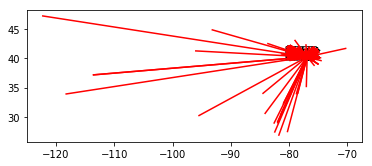

In [13]:
plot(df, pa_house);

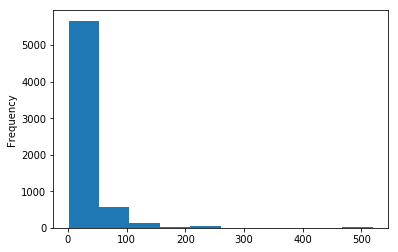

In [14]:
df.amount.plot.hist();

In [15]:
name, out_df = get_filer_from_df(filer_id, expense)

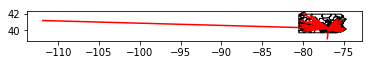

In [16]:
plot(out_df, pa_house);

In [17]:
def amount_to_float(amount):
    if type(amount) == float and np.isnan(amount):
        return np.nan
    pattern = re.compile(r'\$(.*)')
    g = re.match(pattern, amount)
    if g:
        return float(g.groups()[0])
    else:
        return np.nan

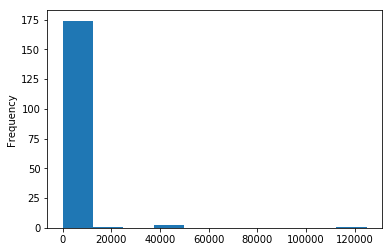

In [18]:
out_df['Expense Amount'].apply(amount_to_float).plot.hist()